In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Data_cleaning_coffee():

    


    def get_data():

        Raw_coffee_data=pd.read_csv('./data/coffee.csv')   

        #removing irrelavant rows  
        coffee_data=Raw_coffee_data[Raw_coffee_data['Species']=="Arabica"]  
        #renaming columns  
        coffee_data=coffee_data.rename(columns={"Country.of.Origin" : "Country_of_Origin","Farm.Name":"Farm_Name","Total.Cup.Points" : "Total_Cup_Points","Processing.Method" : "Processing_Method"})

        #drop columns whose data is less than 70%  
        total_count=coffee_data.count()
        all_columns=coffee_data.columns

        j=0
        drop_columns=[]
        for i in total_count:  
            if (i/coffee_data.shape[0])<0.80:  
                drop_columns.append(all_columns[j])

            j=j+1      
        #After analysis which columns to keep and which ones to drop   

        coffee_data=coffee_data.drop(['Lot.Number', 'Mill'],axis=1)



        coffee_data.head()

        #checking the size of data 
        #print(coffee_data.shape[0])
        #print(pd.value_counts(coffee_data.Species))   

        #coffee_data.drop([f'{Typica}"',"09e3c859cac41901d54f4bd36cce80d19c9272f5"",f'{2013/2014}"' ,f''{unex guatemala, s.a.}'',f''{Specialty Coffee Association}"',"CQI Taiwan ICP CQI??????",f'{KlemOrganics}"'])   

        #Checking for owner column 
        #print(pd.value_counts(coffee_data.Owner)) 


        #Replacing missing values in Owner Column  
        coffee_data.loc[(coffee_data['Farm_Name'] =="los hicaques"), 'Owner'] = "bismarck castro"  
        coffee_data=coffee_data.drop([602,848,882])

        bool_series = pd.isnull(coffee_data["Owner"])  
        coffee_data[bool_series]   

        #only_Honduras=coffee_data[coffee_data['Country_of_Origin']=="Colombia"][['Owner','Country_of_Origin','Farm_Name']] 

        #only_Honduras= only_Honduras.groupby(['Owner', 'Farm_Name']).size().reset_index(name='Freq')  
        #only_Honduras[only_Honduras['Farm_Name']=="supply chain ecom cca s.a."]   

        #checking missing values in country of origin  
        #print(pd.value_counts(coffee_data.Country_of_Origin)) 
        bool_series = pd.isnull(coffee_data["Country_of_Origin"])  
        coffee_data[bool_series]   


        #Checking values in altitude   

        #print(pd.value_counts(coffee_data.Region)) 
        bool_series = pd.isnull(coffee_data["Region"]) 
        #print(coffee_data[bool_series])




        for i in range(18,31): 
            coffee_data[coffee_data.columns[i]]=pd.to_numeric(coffee_data[coffee_data.columns[i]], errors='coerce')


        #print(coffee_data.mean(axis=0,skipna=True))
        return coffee_data


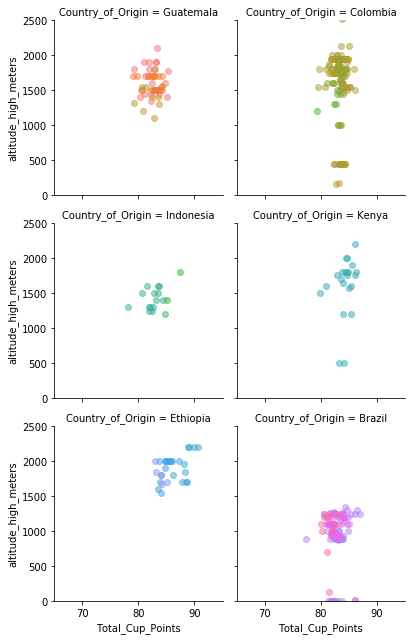

In [14]:
from basic_analysis import Data_cleaning_coffee

coffee_data=Data_cleaning_coffee.get_data()

select_countries=['Guatemala','Colombia','Indonesia','Kenya','Ethiopia','Brazil']


#Regions_in_countries={}

count=0

cols=['ID', 'Species', 'Owner', 'Country_of_Origin', 'Farm_Name',
       'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total_Cup_Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']

Country=pd.DataFrame(columns=cols)


for i in select_countries:
    for j in range(0,coffee_data.shape[0]):
        if coffee_data.iloc[j].Country_of_Origin == i:
            Country=Country.append(coffee_data.iloc[j], ignore_index=True)
             

#finding out which countries have data in ft
foot_data=Country[Country['unit_of_measurement']=='ft'][['Country_of_Origin','Total_Cup_Points']]

#Deleting foot rows
Country=Country[Country.unit_of_measurement != 'ft']

     
g = sb.FacetGrid(Country, col="Country_of_Origin", hue="Region",col_wrap=2)
g.map(plt.scatter, "Total_Cup_Points", "altitude_high_meters", alpha=0.5)
g.set(xlim=(65,95), ylim=(0, 2500))


plt.show()

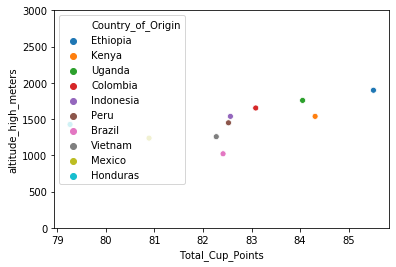

In [9]:
from basic_analysis import Data_cleaning_coffee




coffee_data=Data_cleaning_coffee.get_data()



#Country-Wise Total cup point average

coffee_data=coffee_data[coffee_data.unit_of_measurement != 'ft']

grp_coffee_data=coffee_data.groupby(['Country_of_Origin'],sort=False).mean()


grp_coffee_data.reset_index(level=0, inplace=True)
grp_coffee_data=grp_coffee_data.sort_values(by=['Total_Cup_Points'],ascending=False)
grp_coffee_data=grp_coffee_data[grp_coffee_data['Country_of_Origin'].isin(['Brazil','Mexico','Vietnam','Colombia','Indonesia','Kenya','Ethiopia','Peru','Honduras','Uganda'])]

ax=sb.scatterplot(x='Total_Cup_Points',y='altitude_high_meters',data=grp_coffee_data,hue='Country_of_Origin')
plt.ylim(0,3000)

plt.show()


In [15]:
from basic_analysis import Data_cleaning_coffee

coffee_data=Data_cleaning_coffee.get_data()

#AS by research from google i found out that semi-dry and honey are almost same and can combine

coffee_data.loc[coffee_data['Processing_Method']=='Pulped natural / honey', 'Processing_Method'] = 'Semi-washed / Semi-pulped'



new_coffee_data=coffee_data[coffee_data['Country_of_Origin'].isin(['Brazil','Mexico','Vietnam','Colombia','Indonesia','Kenya','Ethiopia','Peru','Honduras','Uganda'])][['Country_of_Origin','Processing_Method']]

new_coffee_data_freq=pd.value_counts(new_coffee_data.Processing_Method)

new_coffee_data= new_coffee_data.groupby(['Country_of_Origin', 'Processing_Method']).size().reset_index(name='Freq') 
print(new_coffee_data)
print(new_coffee_data_freq)







   Country_of_Origin          Processing_Method  Freq
0             Brazil              Natural / Dry    79
1             Brazil                      Other     1
2             Brazil  Semi-washed / Semi-pulped    31
3             Brazil               Washed / Wet     6
4           Colombia              Natural / Dry    27
5           Colombia               Washed / Wet   120
6           Ethiopia              Natural / Dry    17
7           Ethiopia               Washed / Wet     8
8           Honduras              Natural / Dry    12
9           Honduras               Washed / Wet    35
10         Indonesia              Natural / Dry     2
11         Indonesia                      Other     4
12         Indonesia  Semi-washed / Semi-pulped     5
13         Indonesia               Washed / Wet     6
14             Kenya              Natural / Dry     2
15             Kenya               Washed / Wet    22
16            Mexico              Natural / Dry    17
17            Mexico  Semi-w